# PAMAP2 Physical Activity Monitoring Data Analysis

# Content

## 1. Introduction

## 2. Loading the Data 

## 3. Data Cleaning

## 4. Exploratory Data Analysis

## 5. Hypothesis Testing

## 6. Predictive Modelling


# 1. Introduction

The goal of this project is to help develop hardware and software that can determine the type of physical activity carried out by an individual using various data science research techniques to get actionable insights using the PAMAP2 Physical Activity Monitoring dataset provided.

For this assignment, the dataset used is PAMAP2, an Activity Monitoring dataset that covers 18 different physical activities taken by 9 different subjects, 8 men and 1 woman, using 3 Colibri wireless IMUs(Inertial Measurement Units) and 1 HR monitor (Heart Rate Monitor) which will be further used in the report for the analysis.These IMU sensors are placed on the dominant arm's hand, chest, and ankle, over the wrist. Each of the 9 people adheres to the procedure, and the.dat file has the detailed information. Details about this data can be found in the DataCollectionProtocol file.

In this analysis:
* First I would be focussed on getting dataset ready for extracting further insights that includes mainly loading the data and   cleaning it accordingly.

* In Data cleaning we will be addressing the missing values and Data quality.

* In Exploratory Data Analysis and Hypothesis testing we will extract the insights by using specific variables, which includes
the heart rate, temperature, and acceleration of an individual.

* Also, other exploration techniques are used throughout the modeling phases to assist the model development. 


### Let us import all the standard python libraries, such as Numpy, Pandas, Seaborn, and Matplotlib, which is the primary step for loading the data and appropriately handling missing or dirty data.

In [1]:
# Standard imports to work with Numpy, pandas, seaborn, matplotlib libraries.

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings#to ignore warnings in the notebook
warnings.filterwarnings('ignore')

# 2. Loading the Data

In [2]:
 
import os
cwd = os.getcwd()
print('Current working directory is %s' %cwd)


Current working directory is C:\Users\Chethan\Python-Notebooks


In [3]:
# Load data

# We have 9 subject data files, and I will append data after taking all the files into one list called subject_files.
subject_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]

# Subject id from subject information file
subjectID = [1,2,3,4,5,6,7,8,9]

# Mapping all the activities to respictive values using dictionary in python by refering readme file
activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

#  Defining column names for all 54 columns by referring readme file, which is not available in the gven data file
colNames = ["timestamp", "activityID","heartrate"]

IMU_hand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMU_chest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMU_ankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

# Merging all columns in one list
columns = colNames + IMU_hand + IMU_chest + IMU_ankle  

len(columns)# Gives total number of columns


54

In [4]:
df = pd.DataFrame()
temp=[]
for file in subject_files:
    data = pd.read_csv(file, header=None, sep='\s+')
    data.columns = columns
    data['subjectID']=int(file[-5])
    temp.append(data)
    df=pd.concat(temp)
df.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subjectID
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


### We can see the Data preview after merging all the subject files, as displayed in the above table. Now, after checking the sample data, we will be doing the Data Cleaning process.



# 3. Data Cleaning

By looking at the dataset and going through how the data was collected, several issues need to be resolved before conducting an analysis.

As we can see above, records with an activity of 0 are only transitory measurements of subjects between activities. Therefore, these entries will be eliminated, which is not helpful for our analysis.

Further, we will remove orientation columns from the data frame since these columns are invalid(source: readme file).

In [5]:
# Eliminating the 0 values from activityID column
df = df[df['activityID']!=0] 

# removing invalid columns
df=df.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',       #dropping columns since its invalid
            'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],axis=1)



In [6]:
df.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subjectID
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [7]:
#checking for duplicated entries
df.duplicated().sum()

0

In [8]:
#Checking the NaN values/null values on entire dataframe
df.isnull().values.any() 

True

From the above output, we can see Nan/Null values in the data frame. So now, let us find out the percentage of null values for all the columns.

In [9]:
# Missing values
null_count=df.isnull().sum()
null_percentage = (null_count / len(df))*100
null_percentage.sort_values(ascending=False)

heartrate           90.868776
handMagne2           0.572554
handAcc6_2           0.572554
handMagne3           0.572554
handMagne1           0.572554
handGyro3            0.572554
handGyro2            0.572554
handAcc6_3           0.572554
handGyro1            0.572554
handAcc6_1           0.572554
handAcc16_3          0.572554
handAcc16_2          0.572554
handAcc16_1          0.572554
handTemperature      0.572554
ankleMagne3          0.437857
ankleAcc16_1         0.437857
ankleAcc16_2         0.437857
ankleAcc16_3         0.437857
ankleAcc6_1          0.437857
ankleAcc6_2          0.437857
ankleMagne1          0.437857
ankleMagne2          0.437857
ankleAcc6_3          0.437857
ankleGyro1           0.437857
ankleGyro2           0.437857
ankleGyro3           0.437857
ankleTemperature     0.437857
chestMagne3          0.124558
chestAcc6_2          0.124558
chestMagne2          0.124558
chestMagne1          0.124558
chestGyro3           0.124558
chestGyro2           0.124558
chestGyro1

As per the above observation, the heart rate column's data are missing in more than 90% of the cells. Therefore, there could be a significant bias due to imputed values. Although dropping the heart rate column is an option, one of the main objectives of this research is to see whether it is a reliable predictor of the activity being performed.


Let us look at how the distribution of the heart rate changes for different imputation strategies. 
First, we will compare Median, Mean, and Removal imputation strategies.

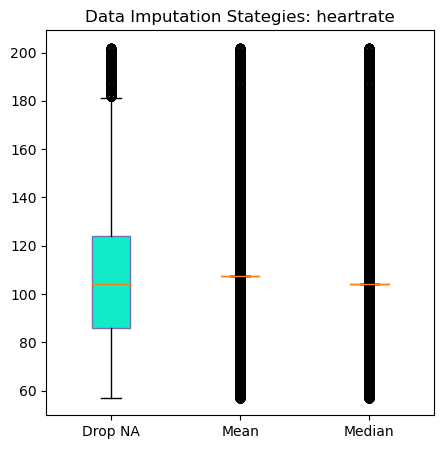

In [10]:
import matplotlib.pyplot as plt

'''
A equate_impute function which accepts a list of variables, and returns a subplot for each variable 
with box plots of each imputation strategy applied, using mean, median and 
removal of values. 
'''

def equate_impute(variables):  
    fig= plt.figure(1,figsize=(5,5))
    i = 111
    for variable in variables:
        ax=fig.add_subplot(i)
        bp = ax.boxplot([df[variable].dropna(),df[variable].fillna(df[variable].mean()),\
        df[variable].fillna(df[variable].median())],patch_artist=True)
        for box in bp['boxes']:
            box.set(color='#7570b3',linewidth=1)
            box.set(facecolor='#13EAC9')
        for whisker in bp['whiskers']:
            plt.title('Data Imputation Stategies: %s' %variable)
            ax.set_xticklabels(['Drop NA','Mean','Median'])
            i += 1
        return

equate_impute(['heartrate'])  
            

As per the above observation, imputation with the heart rate distribution reduces the variance of the sample which may further lead to significiant bias. With this knowledge, the entries for which heart rate values are unavailable will be removed from the research as we evaluate the predictive power of the heart rate variable, which is related to an individual's activity.

Despite the fact that 90% of the information is lost in this approach, we will still have a data collection that, given its size, has to be statistically representative of the population. Furthermore, this strategy offers certain benefits because exploratory analysis and the creation of prediction models may be done considerably more efficiently with a smaller amount of data.

In [11]:
#removing duplicate values
df = df.drop_duplicates()

In [12]:
df = df.fillna(df.mean())


In [13]:
df.isnull().values.any() 

False

In [14]:
df.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subjectID           0
dtype: int64

In [15]:
len(df)

1942872

Now we have 1942872 entries which will be helpful for doing further analysis.

# 4. Exploratory Data Analysis


In this section of the analysis, the data set will be analyzed through various descriptive statistics followed by data visualizations using plots. This analysis will be performed to understand the context of how certain variables get affected in performing different activities. Hence we can see the future inference over what action an individual can perform given certain information. Moreover, it would provide an actionable insight into how predictive models may or may not work well with this data.

Let's start by selecting a few variables: Heart rate, Temperature(hard, ankle, chest), and Acceleration of a given subject. 

## 4.1 Training and Testing Split

Before performing this we will split the data set as a training and testing split for exploratory and validation purposes.Using this we will be able to see and test our observations on data which has been unseen.



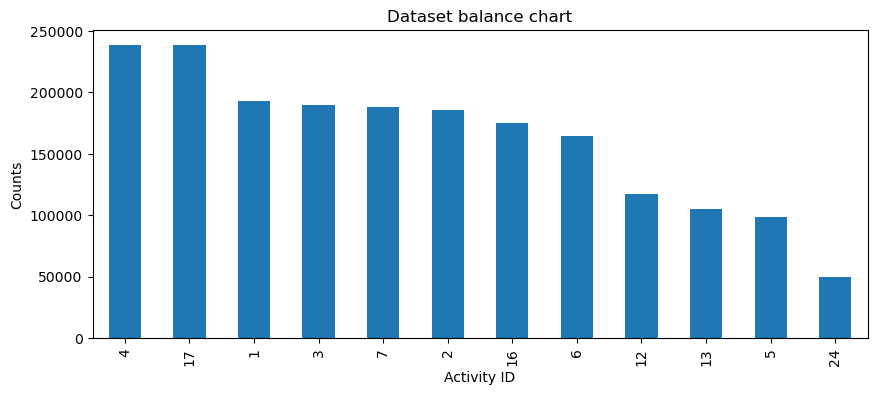

In [16]:
df['activityID'].value_counts().plot(kind = "bar",figsize = (10,4))
plt.title("Dataset balance chart")
plt.xlabel("Activity ID")
plt.ylabel("Counts")
plt.show()

As the above plot shows, the dataset is balanced. Now, let's split the dataset, and the most commonly used dataset split is 80%-20% for the Train set and Test set, respectively.

In [17]:
from sklearn.utils import shuffle
df_shuffle = shuffle(df)
df_trainset = df_shuffle[:int(0.8*len(df_shuffle))]
df_testset = df_shuffle[int(0.8*len(df_shuffle)):]

## 4.2 Heart Rate

At this stage, we will start with exploring the heart rate variable as it is our most precise parameter of check for tracking subjects during activities, as implied by the various indications on the readme file of the dataset. So let us have a quick look at understanding this variable via some descriptive statistics and visualizing its distribution by plotting the graph.

In [18]:
df_trainset['heartrate'].describe().round(2)

count    1554297.00
mean         107.47
std            8.16
min           57.00
25%          107.47
50%          107.47
75%          107.47
max          202.00
Name: heartrate, dtype: float64

### Plot for the heart rate distribution and probability estimate using Kernel Density Estimation

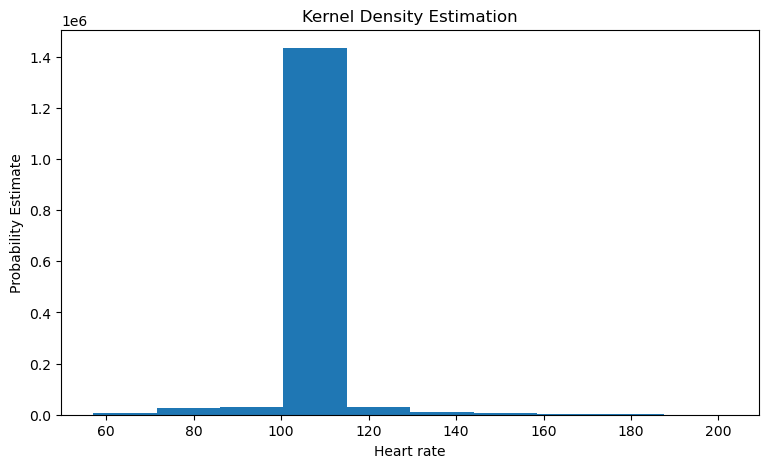

In [19]:
figure = plt.figure(2,figsize=(9,5)) 
plt.hist(df_trainset['heartrate'])
plt.title('Kernel Density Estimation')
plt.xlabel('Heart rate')
plt.ylabel('Probability Estimate')
#plt.grid()
plt.show()

From its distribution we can see that peak is distribiuted between 80-130 BPM.Also if we go through  descriptive statistics table of heartrate which is generate above we can see the minimum and maximum heart rate which is 57 and 202 respecitively.

In [20]:
df_trainset.groupby('activityID').describe()['heartrate']

,count,mean,std,min,25%,50%,75%,max
activityID,,,,,,,,
1,154088.0,104.546263,9.750899,57.000000,107.468502,107.468502,107.468502,115.0
2,148207.0,104.969883,8.255119,63.000000,107.468502,107.468502,107.468502,113.0
3,152008.0,105.736385,6.237155,68.000000,107.468502,107.468502,107.468502,112.0
4,191529.0,107.953340,3.258077,86.000000,107.468502,107.468502,107.468502,128.0
5,78411.0,111.922456,15.692311,81.000000,107.468502,107.468502,107.468502,196.0
6,131727.0,109.071704,5.677846,81.000000,107.468502,107.468502,107.468502,144.0
7,149920.0,108.960889,5.770037,78.000000,107.468502,107.468502,107.468502,147.0
12,93754.0,109.498053,9.003306,71.000000,107.468502,107.468502,107.468502,171.0
13,83989.0,109.463447,9.394364,78.000000,107.468502,107.468502,107.468502,175.0


All statistically significant values are provided in the above table, which we can incorporate for the analysis at the next level.

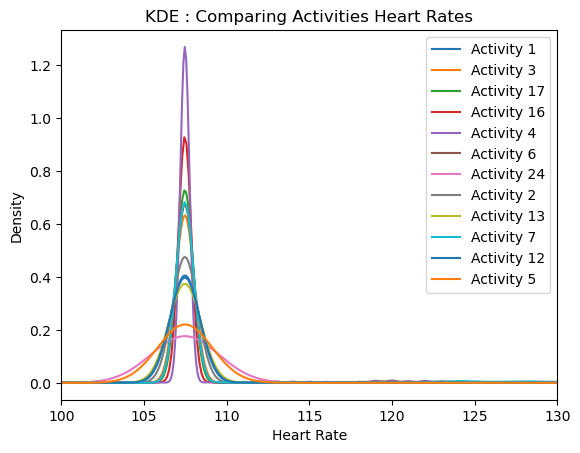

In [21]:
fig, ax = plt.subplots() #plotting line chart with multiple activities dimension
ax.set_xlim(100, 130)
for activity in df_trainset['activityID'].unique():
    s = df_trainset[df_trainset['activityID'] == activity]['heartrate']
    s.plot.kde(ax=ax, label='Activity %i'%activity)
ax.legend()
plt.title('KDE : Comparing Activities Heart Rates')
plt.xlabel('Heart Rate')
plt.show()

From the above KDE plot we can find several heart rate subgroups with a variety of distribution and peaks.
For an instance, Activity 4 has the highest peak between 105 to 110 bpm with a small variance compared to activity 24 which is positively skewed between 100 to 130 BPM.

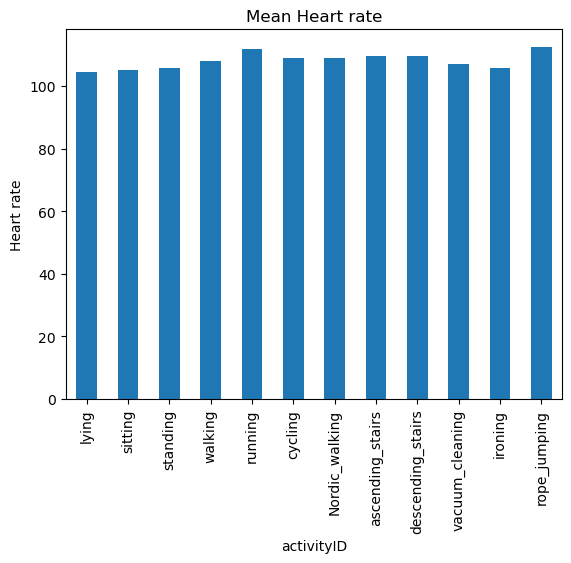

In [22]:
df_hr_act = df_trainset['heartrate'].groupby(df_trainset['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')
plt.title("Mean Heart rate")
plt.ylabel("Heart rate")
plt.show()

The evidence presented above indicates that the heart rate is a reliable basis for differentiating across activities, each of which has a unique range of values. We can see that Running and rope jumping will be complex activities since the mean heart rate is high. Heart rate varies for each activity and thus serves as a reliable indicator.

## 4.3 Temperature

#### Plot for the observation of temperature across Chest Hand and Ankle parts of the Body

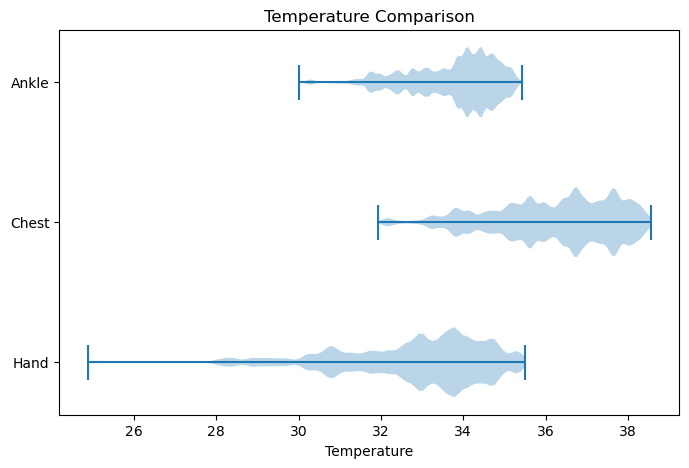

In [23]:
fig = plt.figure(5,figsize=(8,5))
ax = fig.add_subplot(1,1,1)
position = [1,2,3]
ax.violinplot([df_trainset['handTemperature']\
                ,df_trainset['chestTemperature']\
                ,df_trainset['ankleTemperature']],position,vert=False)
ax.set_yticks(position)
plt.title('Temperature Comparison')
plt.xlabel('Temperature')
ax.set_yticklabels(['Hand','Chest','Ankle'])
plt.show()

According to the plot above, we can see that the chest temperature has a higher value ranging between 32 to 38. However, if we observe for Hand and ankle, it ranges between 31-35.
Hand and Chest temperatures are negatively skewed, but the ankle has less variation in accordance to the temperature variable. So if we observe the Hand and chest temperatures by activity in the form of linear regression, we will know how this is performed based on activity.

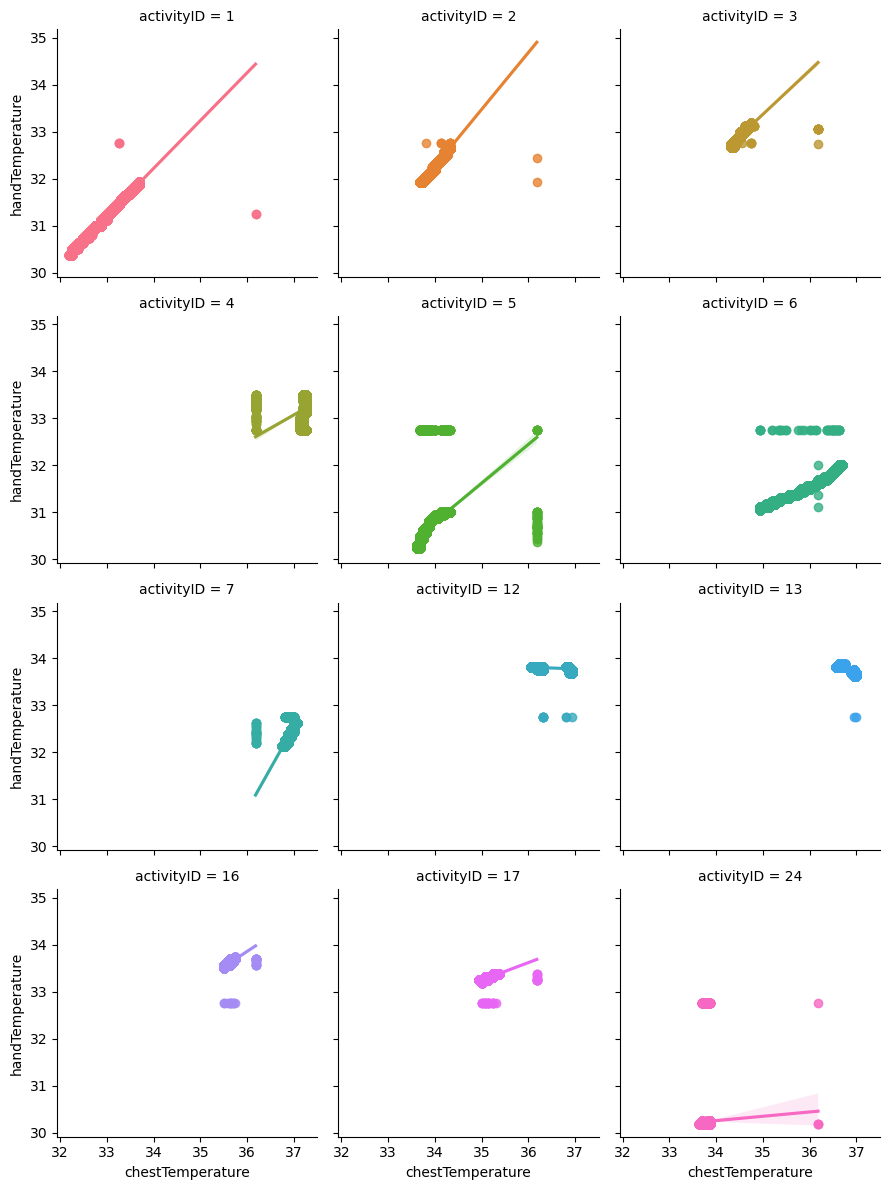

In [24]:
import seaborn as sns
# we are checking on subject1 to get clear preview of the correlation
subject1 = df[df['subjectID']==1] # Targeting on subject1 to get clear view
fig = sns.lmplot(x='chestTemperature', y="handTemperature", col="activityID", hue="activityID",data=subject1, col_wrap=3, height=3)
plt.show()

From the above graph we can infer that chest temperature and hand temperature are highly correlated.

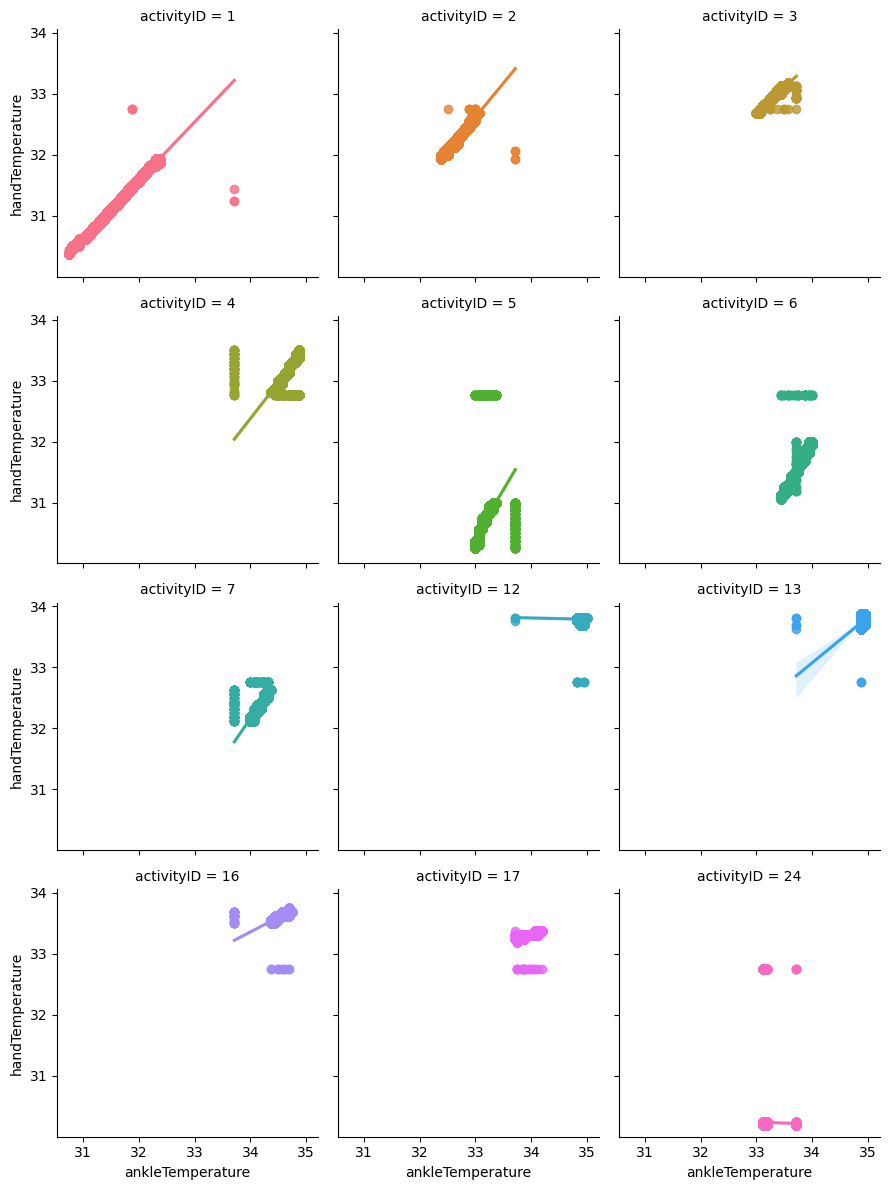

In [25]:
import seaborn as sns
# we are checking on subject1 to get clear preview of the correlation
subject1 = df[df['subjectID']==1] 
fig = sns.lmplot(x='ankleTemperature', y="handTemperature", col="activityID", hue="activityID",data=subject1, col_wrap=3, height=3)
plt.show()

The above plots show a high correlation between ankle and hand temperatures. We can statistically prove this evidence further in the Hypothesis testing phase later in the report.

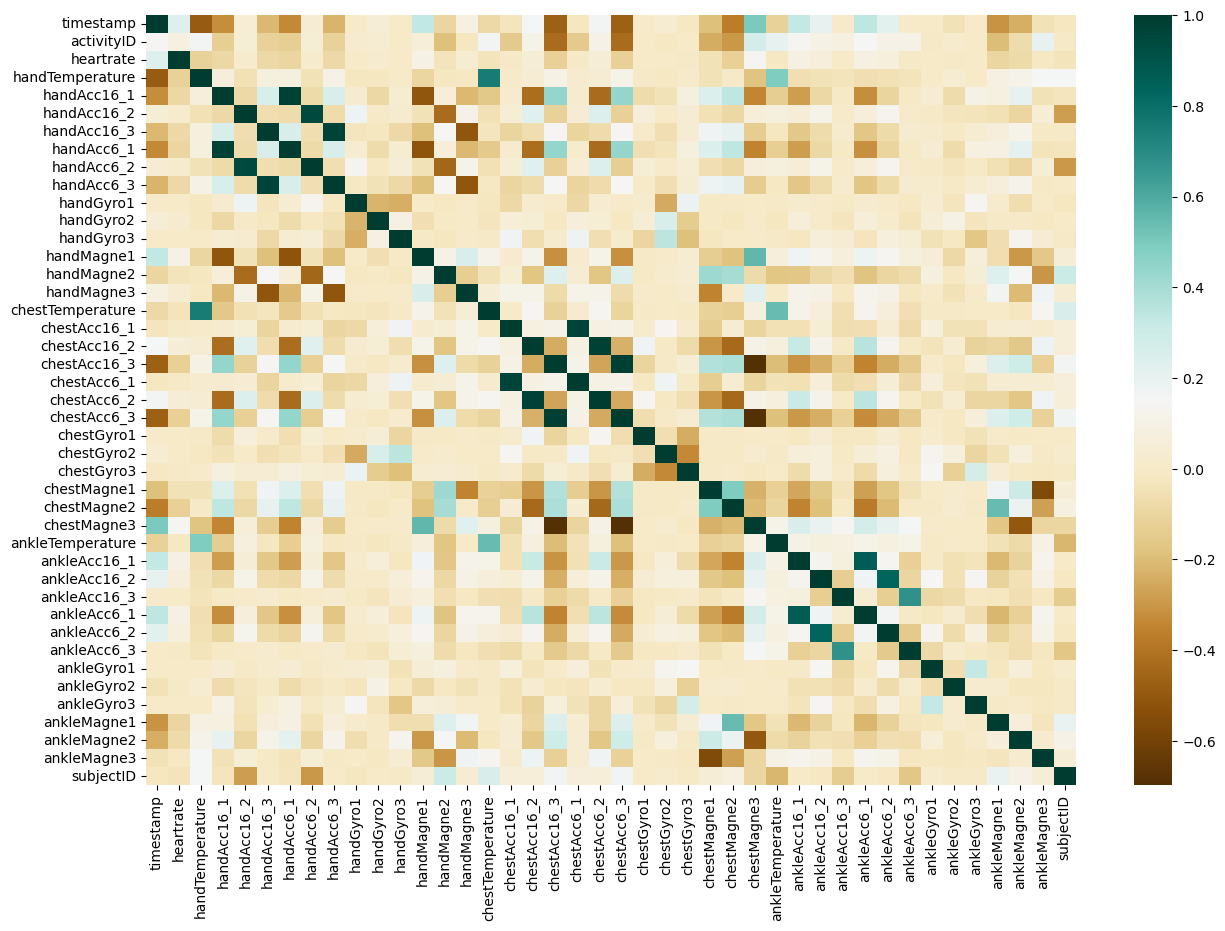

In [26]:
from pandas.plotting import scatter_matrix
df_corr = df_trainset.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

The heatmap above shows the statistical similarity between our different columns. We can easily observe that the gyroscopes do not correlate with our other data and seem unnecessary in this model. 

Also on the other view, we can understand the correlation between the accelerometers of the hand and temperature. On all three hand accelerometer cases, the two are highly associated. Furthermore, the chest Magnetometers correlate with heart rate, which is logical as they are very close together in the body.

# 5. Hypothesis Testing

In [27]:
df_trainset['heartrate'].describe().round(2)

count    1554297.00
mean         107.47
std            8.16
min           57.00
25%          107.47
50%          107.47
75%          107.47
max          202.00
Name: heartrate, dtype: float64

## 5.1 Hypothesis-1
We will formally test the first hypothesis based on whether the heart rate variable is correlated with various activities.

"If your heart rate varies depending on your activity, then the more challenging activities will increase your heart rate."

We have two variables on the given hypothesis which is as mentioned below:


1.Dependent Variable: heartrate
2.Independent Variable: activity

Null Hypothesis, H0 : The heart rate is unaffected by any activity. 
                    𝐻0: Assumed mean μ=105

Alternative Hypothesis,H1 : The activity drives the heart rate. 
                    𝐻1: Assumed mean μ≥105
                    
                   
N=1554297   𝑋̅(sample mean)=107.47  std=8.16

We need a probability value to standardize the hypothesis in order to evaluate this hypothesis, and the p-value has a critical threshold value of 0.05. Therefore, the null-hypothesis is rejected, and the alternative-hypothesis is accepted if the p-value is less than or equal to 0.05. Therefore, we must run the Z test and get the Z value in order to calculate the p-value.


With the preceding data, we can compute the Z value, which is demonstrated using the code below, which would be the critical value for obtaining the p-value.

Z Value>=377.37

In [28]:
# Code snippet To calculate z value
import math
sample_mean=107.47
assumed_mean=105
std=8.16
n=1554297
z=((sample_mean-assumed_mean)/(std/math.sqrt(n)))

print("The obtained z value is",z)

The obtained z value is 377.3755846700956


In [29]:
#To find p value
from scipy import stats
p_value=1-stats.norm.cdf(z)
print("p value correspanding to z value greater than or equal to", z, "is ", p_value)

p value correspanding to z value greater than or equal to 377.3755846700956 is  0.0


#### From the obtained p value, We can reject the null hypothesis and accept the alternative hypothesis, which states that engaging in more complicated activities has an impact on high heart rates because the p-value is 0.0, which is less than or equal to 0.05.




##  5.2 Hypothesis-2

We are now formulating a hypothesis based on the linear regression plotted on the ankle temperature and hand temperature correlation previously.

"If ankle temperature and hand temperature are related, then the correlation between ankle and hand temperature is high."

Null Hypothesis,𝐻0: ankle temperature and hand temperature are not correlated: slope co-efficient=0 

Alternative Hypothesis, H1: ankle temperature and hand temperature are correlated: slope co-efficient!=0 

To test this Hypothesis, the linear regression model will opt. If we get a probability value less than the standard p-value of 0.05, we reject the Null-Hypothesis; otherwise, we choose an alternative Hypothesis. Let us find out the p-value to do the hypothesis test.

In [30]:
import scipy.stats as sp
res = sp.linregress(df_testset['ankleTemperature'],df_testset['handTemperature'])#use ankle and hand
res

LinregressResult(slope=0.8092206132943195, intercept=5.475862902988148, rvalue=0.494732622099166, pvalue=0.0, stderr=0.0022803550140541693, intercept_stderr=0.07691545395496263)

#### From the obtained p-value, We can reject the null hypothesis and accept the alternative hypothesis, which states that ankle and hand temperature are correlated.



# 6. Predictive Modeling

This analysis phase's primary goal is to build a predictive regression model for certain variables within the data set provided.The model we will create will be based on the assumption that the future prediction value can be approximately calculated using a linear input data model.

x=(B1 * y1 )+ (B2 * y2) + C + e
where,

    x    = predicted value for the dependent variable
    y1B1 = regression coefficient (y1) of the first independent variable (B1)
    y2B2 = regression coefficient (y2) of the second independent variable (B2)
     c   = Constant
     e   = random error term
     
     
First, we estimate the values or numbers(y1 and y2) to multiply with the independent variable and add two more parameters, like Constant(C) and random error term(e), to the expression.Additionally, the random error word mostly refers to unpredictable fluctuations that we cannot predict. This model's dependent and independent variables will help us get a good estimate and provide the right interpretation.



## 6.1 Predicting Chest Temperature




In [31]:
print(' Correlations of Top Chest Temperature:')
df_trainset.corr()['chestTemperature'].sort_values(ascending=False)[0:3]

 Correlations of Top Chest Temperature:


chestTemperature    1.000000
handTemperature     0.754024
ankleTemperature    0.547565
Name: chestTemperature, dtype: float64

####  Implementing Function which returns the coefficeints of a Linear-Regression fit and R^2 coefficent

In [32]:
from sklearn import linear_model
def regression(train,test,target_variable,variable1,variable2):  # Function which returns the coefficeints of a Linear-Regression fit and R^2 coefficent
    x_train= train.loc[:,[variable1,variable2]]
    y_train = train.loc[:,[target_variable]]
    x_test = test.loc[:,[variable1,variable2]]
    y_test = test.loc[:,[target_variable]]
    regression_instance = linear_model.LinearRegression().fit(x_train,y_train)
    coefficients = regression_instance.coef_.tolist()
    intercept = int(regression_instance.intercept_)
    train_score = regression_instance.score(x_train,y_train)
    test_score = regression_instance.score(x_test,y_test)
    return coefficients, intercept, train_score, test_score, regression_instance

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def model_viz(train,test,target_variable,variable1,variable2,fig_no): #function to call liner_regression function and plot the model and scatter plot.
    coefficients, intercept, train_score, test_score, regression_instance = regression(train,test,target_variable,variable1,variable2)
    xvalues = np.linspace(df[variable1].min(),df[variable1].max(),100)
    yvalues = np.linspace(df[variable2].min(),df[variable2].max(),100)
    xx,yy = np.meshgrid(xvalues,yvalues)
    onlyX = pd.DataFrame({variable1: xx.ravel(), variable2: yy.ravel()})
    zz = np.array(intercept) + np.array(coefficients[0][0]) * xx + np.array(coefficients[0][1]) * yy
    fig=plt.figure(fig_no,figsize=(10,10))
    ad = fig.add_subplot(111, projection='3d')
    ad.plot_surface(xx,yy,zz.reshape(xx.shape),cmap=plt.cm.RdBu_r, alpha=0.6,linewidth=3) # Plot model landscape
    ad.scatter(train[variable1][:1000],train[variable2][:1000],train[target_variable][:1000],color='Red',label='Training Data') # Plot training data points
    ad.scatter(test[variable1][:1000],test[variable2][:1000],test[target_variable][:1000],color='Black',label='Testing Data') # Plot testing data points
    ad.set_xlabel('%s'%variable1)
    ad.set_ylabel('%s'%variable2)
    ad.set_zlabel("%s"%target_variable)
    plt.legend(loc='upper left', numpoints=1, ncol=4, fontsize=7.5, bbox_to_anchor=(0, 0))
    plt.title('Linear Regression \n Estimated model: %s = %.3f x %s + %.3f x %s+ %.3f' % (target_variable,coefficients[0][0],variable1,coefficients[0][1],variable2,intercept))
    plt.show()
    
    return coefficients, intercept, train_score, test_score, regression_instance

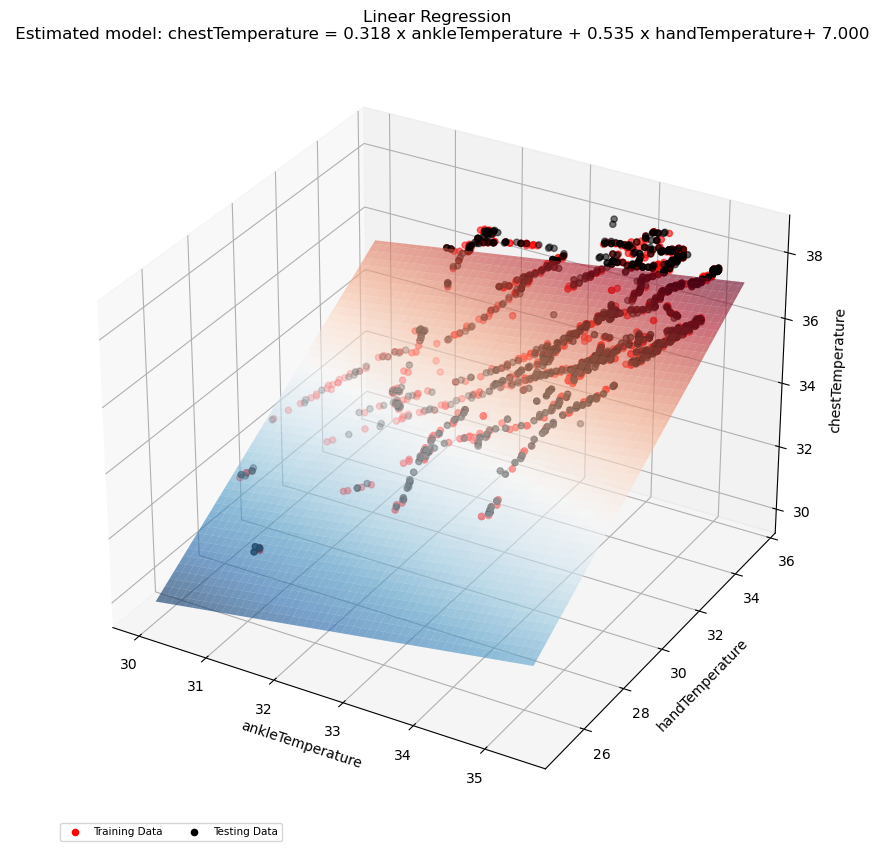

In [34]:
model1 = model_viz(df_trainset,df_testset,'chestTemperature','ankleTemperature','handTemperature',1)

All the points are high degrees, as seen in the figure above. We can talk about the quantified data it contains in the subsequent module evaluation section. Following this, we will continue to evaluate the constructed model statistically and compare the performance of the two models.

##  6.2 Predicting Heart Rate


In [35]:
print('Correlations for the Top Heart Rate : ')
df_trainset.corr()['heartrate'].sort_values(ascending=False)[0:3]

Correlations for the Top Heart Rate : 


heartrate      1.000000
timestamp      0.236157
chestMagne3    0.135998
Name: heartrate, dtype: float64

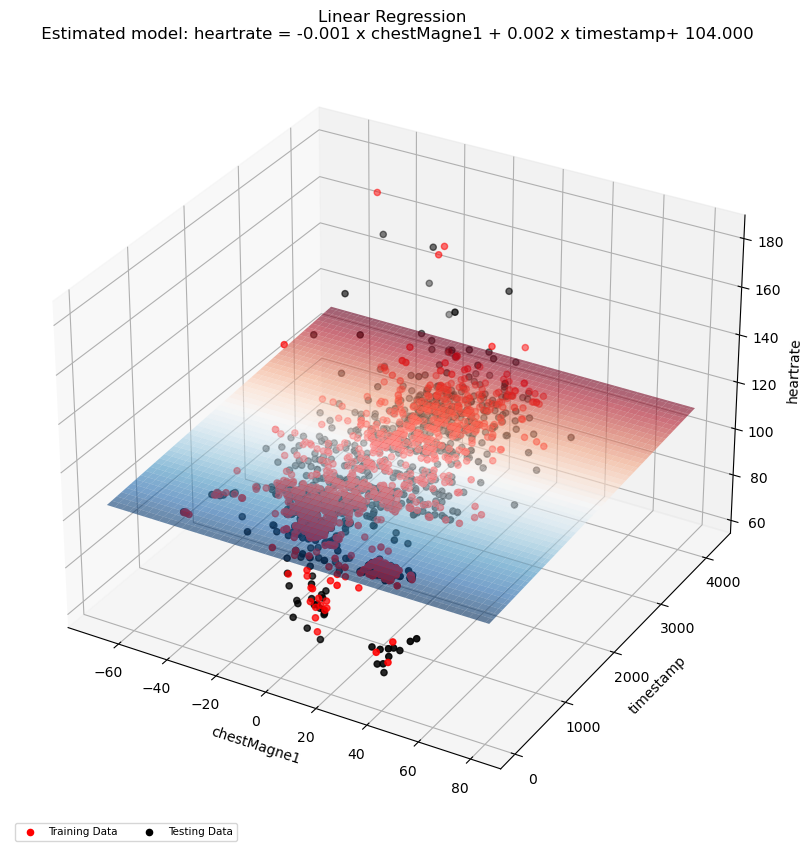

In [36]:
model2 = model_viz(df_trainset,df_testset,'heartrate','chestMagne1','timestamp',12)

From the above plot, the model fits the data points very well, apart from the higher and lower tails. A quadratic fit might work better for this model.

# 6.3 Model Evaluation

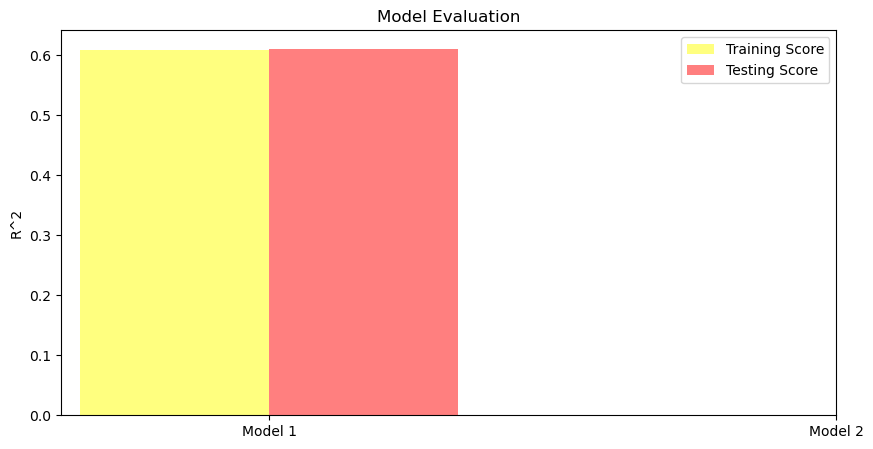

In [37]:
models = [model1,model2]
def model_evaluation(models): #functions to plot the testing and traing score for each model
    figure = plt.figure(7,figsize=(10,5))
    ax = figure.add_subplot(111)
    j = 1
    e = 2
    for i in models:
        ax.bar([j],i[2],1,color='yellow',alpha=0.5)
        ax.bar([e],i[3],1,color='red',alpha=0.5)
        plt.legend(['Training Score','Testing Score'])
        j += 3
        e += 3
        plt.title('Model Evaluation')
        plt.ylabel('R^2')
        ax.set_xticks([1.5 + (3*i) for i in range(len(models))])
        ax.set_xticklabels(['Model 1','Model 2'])
        plt.show()
        return
model_evaluation(models)

When comparing the two models quantitatively, we can see that they both performed similarly and that the variable is subject to a 60% variance. Additionally, the training and testing scores are similar in both models. This outcome demonstrates that our models do not overfit the data; instead, they are good at generalizing to new data.

# 6.4 Predictive Modelling based on Activity

In this section, we will examine the variable activityID in order to infer from unlabeled data what activity is being performed. Since devices automatically record data that might not clearly inform the device what activity is being performed, a specific class of activities will be financially sustainable.
As a result, employing alternative strategies enhances both commercial reach and individual targeting by promoting preferred activities. The data must be processed because the data set has a significant number of dimensions.



We will utilize Principal Component Analysis (PCA) to handle the data set's high degree of dimensionality. Since PCA may give our data set a low-dimensional representation, it will help us choose the classification model. This can be achieved by standardizing the data to have a 0 center and taking responsibility for variables having different unit systems. The PCA obtains the most significant eigenvalues inside the dataset covariance matrix, which identifies the majority of variation components/axes in the data set. The number of components used is a hyperparameter that must be chosen before the data is translated to new axes. As a result, the timestamps for each particular activity will differ, and all activities will be carried out in order.

In [38]:
#implementing function to filter the dataframe for the feature inputs and targets
def model_remove(df): 
    Y = df['activityID']
    X = df.drop(['activityID'], axis=1)
    # remove the timestamp
    X = X.drop(['timestamp'],axis=1) 
    return X,Y

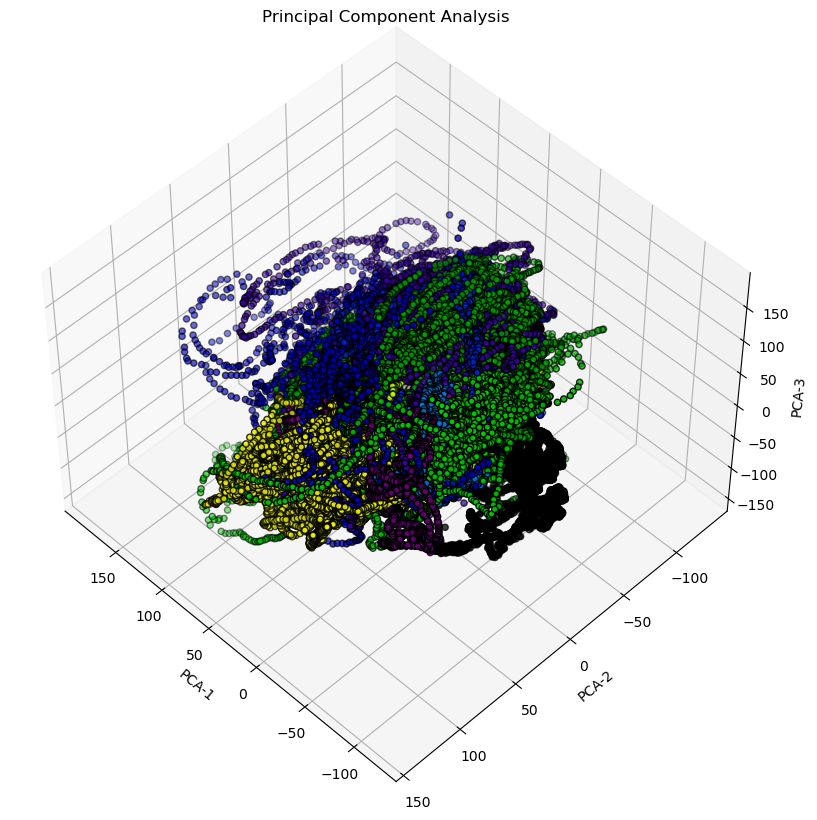

In [39]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


X,y = model_remove(df_trainset)
fig = plt.figure(14, figsize=(8, 8))
plt.clf()
axes_3d = Axes3D(fig, rect=[0, 0, .94, 1], elev=49, azim=135)
plt.cla() # clear axis
pca = decomposition.PCA(n_components=3, whiten=False) 
pca.fit(X) # fit pca
X = pca.transform(X) # PCA fit
axes_3d.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,cmap=plt.cm.nipy_spectral,edgecolor='k')
axes_3d.set_xlabel('PCA-1')
axes_3d.set_ylabel('PCA-2')
axes_3d.set_zlabel('PCA-3')
plt.title('Principal Component Analysis')
plt.show()

The above representation clearly gives the impression that activities are loosely grouped. Given this, we may also infer that a linear model that employs a linear decision boundary, such as a logistic regression, may not be appropriate given that some instances, like the green and blue activities, are nonlinear. 

Therefore, KNN classification will be used for this.


Let us choose the correct K value, which is vital for accurate classification. Hence now, we will be focussing on the optimization of this parameter along with the number of principal components.


We need the number of principal components and Nearest Neighbors to complete this. These two will be evaluated or validated by experimenting with various variables utilizing the Cross-validation process with two folds. The PCA fit transform is followed by the number of principal components, which has been selected as a hyperparameter. In order to train each fold, these have been incorporated into the data pipeline.


To be accurate, we shall divide the training set into two folds, with each taking the training and testing set that was excluded. The model for the training set will first be fitted to the data, and then it will be tested on the data that was excluded. The testing result will then be averaged across two turns and represents the proportion of correctly classified activities. This methodology will be used since it will reduce the possibility that we will improve hyperparameters based on overfitting patterns.

In [40]:
# importing all necessary packages
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def train_model(X,y,n_components,n_neighbors):
    pca = decomposition.PCA(n_components=n_components, whiten=True) 
    pca.fit(X) 
    X = pca.transform(X) 
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors) # KNN instance
    classifier=knn.fit(X,y) 
    return classifier,X,pca

In [41]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


pca = decomposition.PCA(n_components=2, whiten=True)
knn = neighbors.KNeighborsClassifier()

# data pipeline initialization
pipe = Pipeline([('reduce_dim', pca),('classify', knn)])


# parameter grid of the range of hyperparameters
parameter_grid = [{'classify__n_neighbors': [4,7,9],'reduce_dim__n_components':[3,6,8]}]

X,y = model_remove(df_trainset)
grid = GridSearchCV(pipe, cv=2, n_jobs=2, param_grid=parameter_grid)
grid.fit(X, y)
print('Best Score= ',grid.best_score_)
print('Best Estimator= ',grid.best_params_)

Best Score=  0.9784860935736014
Best Estimator=  {'classify__n_neighbors': 4, 'reduce_dim__n_components': 8}


The best parameter, according to the results of the Cross-Validation Grid search above, is when the values of the Neighbors and Principle Components are fixed at 4 and 8, respectively. As a result of the fact that we have only looked at a small subset of parameters, we are likely within the local set. However, we will need to consider the broader range of experiment parameters if we intend to do any further research.




Lets optimize the model with best estimator value obtained as per the above output.

In [42]:
classifier,X,pca = train_model(X,y,4,8)
X_test,y_test = model_remove(df_testset) 
X_test = pca.transform(X_test) 
classifier.predict(X_test) 
print('Testing Accuracy: ', classifier.score(X_test,y_test))

Testing Accuracy:  0.8569259473718073


As we can see, our total accuracy is 85% which suggests that on a set of unseen and unlabeled data, our model can accurately identify which activity is being performed 85% of the time.

We can see that the primary characteristics of physical activity are heart rate, activity, and chest temperature. Chest temperature and heart rate were highly correlated during the activities. Temperature variations and physical activity have an impact on heart rate. With the aid of gear and software, we may capture and process activity data to enhance a person's health benefits.